# SEIRHVD model example
## Model Diagram

<center><img src="../doc/SEIRHVD.png" /></center>



## Equations
\begin{align}
\frac{dS}{dt} = -\alpha \frac{S}{N}[\beta(I_{m}+I_{cr})+\beta_\nu I_{\nu}] + \frac{\rho_{RS}}{\tau_{RS}}R - \Psi + \phi_S \\
\frac{dS_\nu}{dt} = -(1-\nu)\alpha\frac{S_\nu}{N}[\beta(I_{m}+I_{cr})+\beta_\nu I_{\nu}] + \Psi + \phi_{S_\nu} \\
\frac{dE}{dt} = -\alpha\frac{S}{N}[\beta(I_{m}+I_{cr})+\beta_\nu I_{\nu}] - \frac{\rho_{EI_m}}{\tau_{EI_m}}E - \frac{\rho_{EI_{cr}}}{\tau_{EI_{cr}}}E + \phi_E \\
\frac{dE_\nu}{dt} = (1-\nu)\alpha\frac{S_v}{N}[\beta(I_{m}+I_{cr})+\beta_v I_{v}] - \frac{1}{\tau_{E_{\nu}I_{\nu}}}E_\nu + \phi_{E_\nu}  \\
\frac{dI_{m}}{dt} = \frac{\rho_{EI_m}}{\tau_{EI_m}}E - \frac{1}{\tau_{I_{m}R}}I_{m} + \phi_{I_m}  \\
\frac{dI_{cr}}{dt} = \frac{\rho_{EI_{cr}}}{\tau_{EI_{cr}}}E - \frac{1}{\tau_{I_{cr}H}}I_{cr} + \phi_{I_{cr}} \\
\frac{dI_\nu}{dt} = \frac{1}{\tau_{E_{\nu}I_{\nu}}}E_\nu - \frac{\rho_{I_\nu R}}{\tau_{I_\nu R}}I_\nu - \frac{\rho_{I_\nu H}}{\tau_{I_\nu H}}I_\nu + \phi_{I_\nu} \\
\frac{dH}{dt} = (1-H_{sat})\left[\frac{1}{\tau_{I_{cr}H}}I_{cr} + \frac{\rho_{I_\nu H}}{\tau_{I_\nu H}}I_\nu\right] - \frac{\rho_{HR}}{\tau_{HR}}H - \frac{\rho_{HD}}{\tau_{HD}}H + \phi_{H} \\
\frac{dD}{dt} = H_{sat}\left[\frac{1}{\tau_{I_{cr}H}}I_{cr} + \frac{\rho_{I_\nu H}}{\tau_{I_\nu H}}I_\nu\right] + \frac{\rho_{HD}}{\tau_{HD}}H + \phi_{D} \\
\frac{dR}{dt} = \frac{\rho_{I_\nu R}}{\tau_{I_\nu R}}I_\nu + \frac{1}{\tau_{I_{m}R}}I_{m} + \frac{\rho_{HR}}{\tau_{HR}}H - \frac{\rho_{RS}}{\tau_{RS}}R + \phi_{R} \\
H_{sat} = 
\begin{cases} 
      0 & H < H_{capacity} \\
      1 & H = H_{capacity} 
\end{cases} \\
\frac{dN}{dt} = \sum_{i} \phi_{i} \\
N_0 = S_0+S_{\nu0}+E_0+E_{\nu0}+I_{m0}+I_{cr0}+I_{\nu0}+H_0+R_0 \\
\end{align}

This equations describe the dynamics of the following states: 
* $S$: Susceptible individuals 
* $S_\nu$: Vaccinated susceptible individuals 
* $E$: Exposed individuals 
* $E_\nu$: Vaccinated exposed individuals 
* $I_m$: Active asymptomatic, mild and severe infected individuals 
* $I_{cr}$: Active critical infected individuals 
* $I_\nu$: Active vaccinated infected individuals 
* $H$: ICU hospitalized individuals 
* $D$: Deaths 
* $R$: Recovered individuals 

which are governed by the following dynamic parameters:
* $\alpha$: Average number of contacts per person per time
* $\beta$: Probability of disease transmission in a contact between a susceptible and an infectious subject 
* $\beta_\nu$: Probability of disease transmission in a contact between a vaccinated susceptible and an infectious subject 
* $\nu$: Vaccine effectiveness against transmission 
* $\phi_A$: External flux of people that belong to state A 
* $H_{sat}$: Hospital saturation
* $\Phi$: External population flux 
* $N$: Total Population 
* $\Psi$: Vaccination rate 
* $\rho_{AB}$: Transition probability between state A and state B 
* $\tau_{AB}$: Transition period between state A and state B 

In [1]:
# Util libraries
import numpy as np
import matplotlib.pyplot as plt

# cv19 libraries
from cv19gm.models.seirhvd import SEIRHVD 
from cv19gm.models.seir import SEIR 
from cv19gm.utils import cv19functions

In [2]:
# For pop-up plots execute this code (optional)
if False:
    import platform
    OS = platform.system()

    if OS == 'Linux' or 'Darwin':    
        %matplotlib tk
    elif OS == 'Windows':
        %matplotlib qt
        

# Build a basic SEIR with SEIRHVD lib

In [3]:
# Input configuration file
config = 'cfg/SEIRHVD_SEIR.toml'
# Build simulation object
model = SEIRHVD(config = config)
# Simulate (solve ODE)
model.solve()

In [4]:
# Show results
model.results

,t,dates,S,Sv,E,E_d,Ev,Ev_d,Im,Im_d,...,I,I_d,I_ac,I_det,I_d_det,I_ac_det,prevalence_total,prevalence_susc,prevalence_det,CFR
0,0,None,986000,0,3000,1500,0,0,6000,2999,...,6000,2999,15000,6000,2999,15000,0.015000,0.015000,0.015000,0.0
1,1,None,984813,0,3531,1302,0,0,6052,1523,...,6052,1523,18000,6052,1523,18000,0.018000,0.018000,0.018000,0.0
2,2,None,983609,0,3982,1241,0,0,6193,1040,...,6193,1040,19523,6193,1040,19523,0.019523,0.019523,0.019523,0.0
3,3,None,982372,0,4382,1240,0,0,6401,916,...,6401,916,20563,6401,916,20563,0.020564,0.020564,0.020564,0.0
4,4,None,981090,0,4750,1269,0,0,6662,918,...,6662,918,21479,6662,918,21479,0.021480,0.021480,0.021480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0
496,496,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0
497,497,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0
498,498,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0


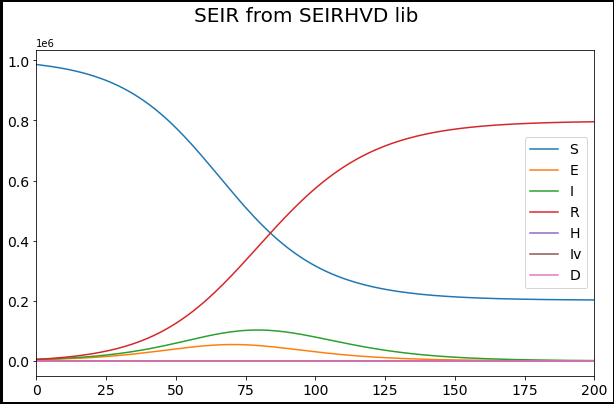

In [5]:
# Plot matplotlib
fig, axs = plt.subplots(figsize=(10,6),linewidth=5,edgecolor='black',facecolor="white")
axs.xaxis.set_tick_params(labelsize=14)
axs.yaxis.set_tick_params(labelsize=14)

axs.plot(model.t,model.S,label='S')
axs.plot(model.t,model.E,label='E')
axs.plot(model.t,model.I,label='I')
axs.plot(model.t,model.R,label='R')
axs.plot(model.t,model.H,label='H')
axs.plot(model.t,model.Iv,label='Iv')
axs.plot(model.t,model.D,label='D')
axs.set_xlim(0,200)
axs.legend(loc=0,fontsize=14)
fig.suptitle('SEIR from SEIRHVD lib',fontsize=20)
plt.show()

## Comparisson with a SEIR model with the same parameters

In [6]:
seirconfig = 'cfg/SEIR.toml'
seirmodel = SEIR(config = seirconfig)# Input configuration file
seirmodel.solve()

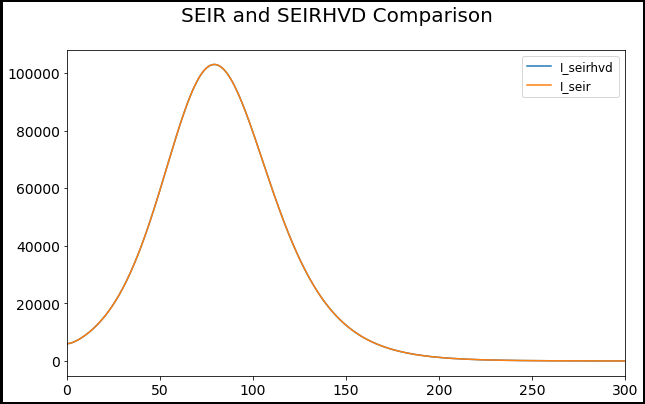

In [7]:
fig, axs = plt.subplots(figsize=(10,6),linewidth=5,edgecolor='black',facecolor="white")
axs.xaxis.set_tick_params(labelsize=14)
axs.yaxis.set_tick_params(labelsize=14)

axs.plot(model.t,model.I,label='I_seirhvd')
axs.plot(seirmodel.t,seirmodel.I,label='I_seir')
axs.set_xlim(0,300)
axs.legend(loc=0,fontsize=12)
fig.suptitle('SEIR and SEIRHVD Comparison',fontsize=20)
plt.show()

# Vaccines

### Single vaccination campaign:
* 400.000 vaccines applied in a 20.000 vaccines per day per 20 days campaign
* 100% effectivity

In [38]:
# Build Vaccine campaign
vac_d = cv19functions.events(values=[0,20000,0],days=[[0,40],[40,60],[60,500]])

In [39]:
# Input configuration file
config = 'cfg/SEIRHVD_SEIR.toml'
# Build simulation object
model_vac = SEIRHVD(config = config,vac_d=vac_d,v = 1.0)
# Simulate (solve ODE)
model_vac.solve()

In [40]:
# Simulation without vaccination campaing
# Input configuration file
config = 'cfg/SEIRHVD_SEIR.toml'
# Build simulation object
model = SEIRHVD(config = config)
model.solve()

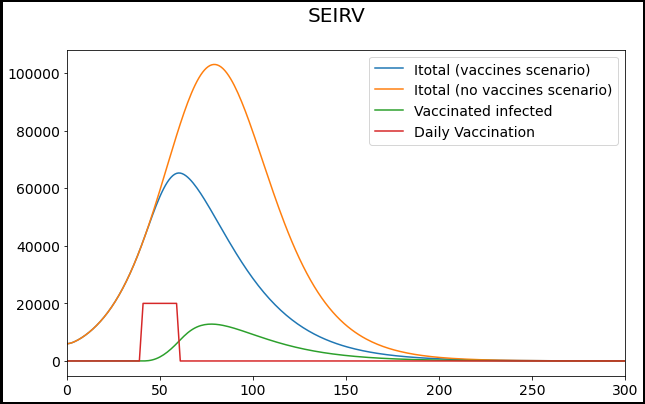

In [41]:
fig, axs = plt.subplots(figsize=(10,6),linewidth=5,edgecolor='black',facecolor="white")
axs.xaxis.set_tick_params(labelsize=14)
axs.yaxis.set_tick_params(labelsize=14)

axs.plot(model_vac.t,model_vac.I,label='Itotal (vaccines scenario)')
axs.plot(model.t,model.I,label='Itotal (no vaccines scenario)')
axs.plot(model_vac.t,model_vac.Iv,label='Vaccinated infected')
axs.plot(np.arange(model_vac.tsim),[vac_d(i) for i in np.arange(model_vac.tsim)],label='Daily Vaccination')
axs.set_xlim(0,300)
axs.legend(loc=0,fontsize=14)
fig.suptitle('SEIRV',fontsize=20)
plt.show()

# Studying the effects of different effectivities

In [42]:
vac_eff = list(np.arange(0,1.1,0.1))
model_vac2 = [SEIRHVD(config = config,vac_d=vac_d,vac_eff = i) for i in vac_eff]
for i in model_vac2:
    i.solve()


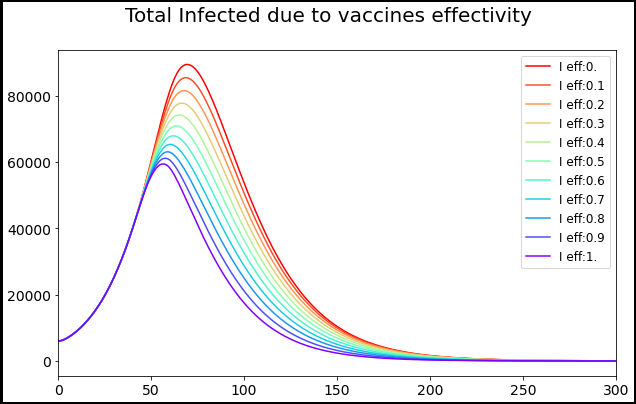

In [43]:
fig, axs = plt.subplots(figsize=(10,6),linewidth=5,edgecolor='black',facecolor="white")
axs.xaxis.set_tick_params(labelsize=14)
axs.yaxis.set_tick_params(labelsize=14)


colors = plt.cm.rainbow_r(np.linspace(0,1,len(vac_eff)))
i = 0
for model_vac in model_vac2:
    #plt.plot(model_vac.t,model_vac.I,label='I with vaccines')
    "{:#.2g}".format(i)
    axs.plot(model_vac.t,model_vac.I,label='I eff:'+"{:#.1g}".format(model_vac.vac_eff(0)),color=colors[i])
    #plt.plot(model_vac.t,model_vac.Iv,label='Iv eff:'+"{:#.1g}".format(model_vac.v(0)),color=colors[i],linestyle='dashed')
    i+=1
#plt.plot(np.arange(model_vac.tsim),[Psi(i) for i in np.arange(model_vac.tsim)],color='red',label='Daily Vaccination')
axs.legend(loc=0,fontsize=12)

axs.set_xlim(0,300)
fig.suptitle('Total Infected due to vaccines effectivity',size=20)
plt.show() 

# Hospitalization: Comparing the effects of different ICU capacities

In [44]:
# Input configuration file
config = 'cfg/SEIRHVD.toml'
# Build simulation object
model1 = SEIRHVD(config = config, H_cap=4000)
model2 = SEIRHVD(config = config, H_cap=3000)
# Simulate (solve ODE)
model1.solve()
model2.solve()

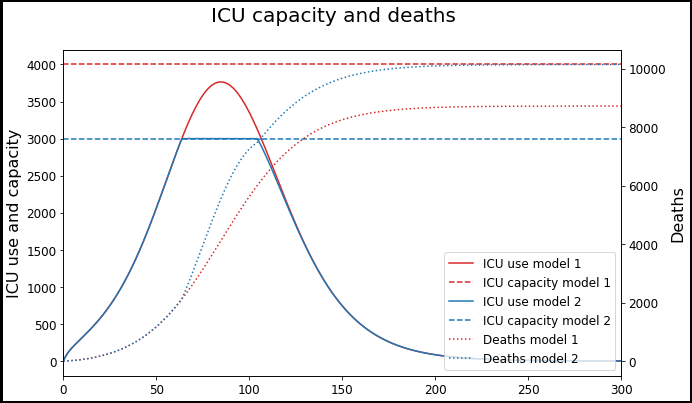

In [45]:
fig, axs = plt.subplots(figsize=(10,6),linewidth=5,edgecolor='black',facecolor="white")

axs.set_ylabel('ICU use and capacity',fontsize=16)
axs2 = axs.twinx()
axs2.set_ylabel('Deaths',fontsize=16)
axs.xaxis.set_tick_params(labelsize=12)
axs.yaxis.set_tick_params(labelsize=12)
axs2.yaxis.set_tick_params(labelsize=12)


# Plot matplotlib
axs.plot(model1.t,model1.H,color='tab:red',label='ICU use model 1')
axs.plot(model1.t,[model1.H_cap]*len(model.t),color='tab:red',linestyle='dashed',label='ICU capacity model 1')

axs2.plot(model1.t,model1.D,color='tab:red',linestyle='dotted',label='Deaths model 1')

axs.plot(model2.t,model2.H,color='tab:blue',label='ICU use model 2')
axs2.plot(model2.t,model2.D,color='tab:blue',linestyle='dotted',label='Deaths model 2')
axs.plot(model2.t,[model2.H_cap]*len(model.t),color='tab:blue',linestyle='dashed',label='ICU capacity model 2')


# ask matplotlib for the plotted objects and their labels
lines, labels = axs.get_legend_handles_labels()
lines2, labels2 = axs2.get_legend_handles_labels()
axs2.legend(lines + lines2, labels + labels2, loc=4,fontsize=12)

plt.xlim(0,300)
#plt.plot(np.arange(model_vac.tsim),[Psi(i) for i in np.arange(model_vac.tsim)])
#axs.legend(loc=1)
fig.suptitle('ICU capacity and deaths',fontsize=20)



plt.show()